In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as ticker
os.chdir("")

In [2]:
# import csvs from fiji segmentation grouped by condition/channel/replicate/embryo as 'sample'
file_lists={"mcitrine_int_r3_e1":[i for i in glob.glob('d3/mcit_1_int.csv')],
            "mcitrine_aat_r3_e1":[i for i in glob.glob('d3/mcit_1_aat.csv')],
            "mcherry+mcitrine_aat_r3_e1":[i for i in glob.glob('d3/mch+mcit_1_aat.csv')],
            "mcherry+mcitrine_int_r3_e1":[i for i in glob.glob('d3/mch+mcit_1_int.csv')],
             "mcherry+mcitrine_aat_r3_e2":[i for i in glob.glob('d3/mch+mcit_2_aat.csv')],
            "mcherry+mcitrine_int_r3_e2":[i for i in glob.glob('d3/mch+mcit_2_int.csv')],
           "mcherry+mcitrine_aat_r3_e3":[i for i in glob.glob('d3/mch+mcit_3_aat.csv')],
            "mcherry+mcitrine_int_r3_e3":[i for i in glob.glob('d3/mch+mcit_3_int.csv')],
            "mcherry-mcitrine_aat_r3_e1":[i for i in glob.glob('d3/mch-mcit_1_aat.csv')],
            "mcherry-mcitrine_int_r3_e1":[i for i in glob.glob('d3/mch-mcit_1_int.csv')],
             "mcherry-mcitrine_aat_r3_e2":[i for i in glob.glob('d3/mch-mcit_2_aat.csv')],
            "mcherry-mcitrine_int_r3_e2":[i for i in glob.glob('d3/mch-mcit_2_int.csv')],
           "mcherry-mcitrine_aat_r3_e3":[i for i in glob.glob('d3/mch-mcit_3_aat.csv')],
            "mcherry-mcitrine_int_r3_e3":[i for i in glob.glob('d3/mch-mcit_3_int.csv')]}

In [3]:
file_lists

{'mcitrine_int_r3_e1': ['d3/mcit_1_int.csv'],
 'mcitrine_aat_r3_e1': ['d3/mcit_1_aat.csv'],
 'mcherry+mcitrine_aat_r3_e1': ['d3/mch+mcit_1_aat.csv'],
 'mcherry+mcitrine_int_r3_e1': ['d3/mch+mcit_1_int.csv'],
 'mcherry+mcitrine_aat_r3_e2': ['d3/mch+mcit_2_aat.csv'],
 'mcherry+mcitrine_int_r3_e2': ['d3/mch+mcit_2_int.csv'],
 'mcherry+mcitrine_aat_r3_e3': ['d3/mch+mcit_3_aat.csv'],
 'mcherry+mcitrine_int_r3_e3': ['d3/mch+mcit_3_int.csv'],
 'mcherry-mcitrine_aat_r3_e1': ['d3/mch-mcit_1_aat.csv'],
 'mcherry-mcitrine_int_r3_e1': ['d3/mch-mcit_1_int.csv'],
 'mcherry-mcitrine_aat_r3_e2': ['d3/mch-mcit_2_aat.csv'],
 'mcherry-mcitrine_int_r3_e2': ['d3/mch-mcit_2_int.csv'],
 'mcherry-mcitrine_aat_r3_e3': ['d3/mch-mcit_3_aat.csv'],
 'mcherry-mcitrine_int_r3_e3': ['d3/mch-mcit_3_int.csv']}

In [4]:
# make dataframe with columns for nucleus (roi), type (NA), pixel coordinates (x/y/z), value (aat/int), filename and sample
data=pd.DataFrame()
for name, items in file_lists.items():
    for csv in items:
        df=pd.read_csv(csv,encoding="utf-8",skiprows=1, usecols=range(2,8),header=None)
        colnames = ["roi", "type", "x", 
                    "y", "z", "value"]
        df.columns=colnames
        df["filename"]=os.path.basename(csv)
        df["sample"]=name
        
        data=data.append(df)

In [5]:
data

,roi,type,x,y,z,value,filename,sample
0,1,0,145.0,75.0,0.0,412.0,mcit_1_int.csv,mcitrine_int_r3_e1
1,1,0,149.0,75.0,0.0,437.0,mcit_1_int.csv,mcitrine_int_r3_e1
2,1,0,150.0,75.0,0.0,418.0,mcit_1_int.csv,mcitrine_int_r3_e1
3,1,0,150.0,76.0,0.0,426.0,mcit_1_int.csv,mcitrine_int_r3_e1
4,1,0,151.0,76.0,0.0,405.0,mcit_1_int.csv,mcitrine_int_r3_e1
...,...,...,...,...,...,...,...,...
15317,110,0,112.0,199.0,4.0,323.0,mch-mcit_3_int.csv,mcherry-mcitrine_int_r3_e3
15318,110,0,113.0,199.0,4.0,352.0,mch-mcit_3_int.csv,mcherry-mcitrine_int_r3_e3
15319,110,0,114.0,199.0,4.0,361.0,mch-mcit_3_int.csv,mcherry-mcitrine_int_r3_e3
15320,110,0,115.0,199.0,4.0,384.0,mch-mcit_3_int.csv,mcherry-mcitrine_int_r3_e3


In [6]:
#melt table to get columns for roi, embryo, repeat (replicate), condition, x/y/z (pixel co-ordinates), raw AAT, intensity
data = data.drop(columns = ["type"])

data[["condition","measure","repeat","embryo"]] = data["sample"].str.split('_',expand = True)
dfmelt = pd.pivot(data,columns=["measure"],values=["value"],index=["roi","embryo","repeat","condition","x","y","z"]).reset_index()
dfmelt.columns = dfmelt.columns.droplevel(0)
dfmelt = dfmelt.rename_axis(None,axis=1)
dfmelt.columns = ["roi","embryo","repeat","condition","x","y","z","raw_aat","int"]


In [7]:
dfmelt

,roi,embryo,repeat,condition,x,y,z,raw_aat,int
0,1,e1,r3,mcherry+mcitrine,28.0,79.0,4.0,39.0,475.0
1,1,e1,r3,mcherry+mcitrine,28.0,79.0,5.0,36.0,444.0
2,1,e1,r3,mcherry+mcitrine,28.0,80.0,4.0,39.0,477.0
3,1,e1,r3,mcherry+mcitrine,28.0,80.0,5.0,40.0,396.0
4,1,e1,r3,mcherry+mcitrine,28.0,81.0,4.0,39.0,473.0
...,...,...,...,...,...,...,...,...,...
128219,183,e2,r3,mcherry+mcitrine,168.0,81.0,11.0,42.0,91.0
128220,183,e2,r3,mcherry+mcitrine,169.0,74.0,11.0,38.0,79.0
128221,183,e2,r3,mcherry+mcitrine,169.0,75.0,11.0,41.0,83.0
128222,183,e2,r3,mcherry+mcitrine,169.0,76.0,11.0,43.0,86.0


In [8]:
#load wrongly segmented nuclei from excel list
notdata = pd.read_csv("rem_emb_d3.csv")
notdata["embryo"]="e"+notdata["embryo"].astype(str)
notdata["repeat"]="r"+notdata["repeat"].astype(str)
notdata

,condition,repeat,embryo,roi
0,mch+mch,r3,e1,49
1,mch+mch,r3,e1,45
2,mch+mch,r3,e1,54
3,mch+mch,r3,e1,58
4,mch+mch,r3,e1,62
...,...,...,...,...
201,mch-mch,r3,e3,89
202,mch-mch,r3,e3,103
203,mch-mch,r3,e3,98
204,mch-mch,r3,e3,108


In [9]:
#remove wrongly segmented nuclei from dataframe
dfsorted=pd.merge(dfmelt,notdata,how="left",indicator=True)
dfsorted = dfsorted.loc[dfsorted["_merge"]!="both"]
dfsorted = dfsorted.drop(columns = "_merge")

In [10]:
#correct aat with formula
dfsorted["aat"]=(dfsorted["raw_aat"]*0.097)-1
dfsorted=dfsorted.drop(columns=['raw_aat'])
dfsorted

,roi,embryo,repeat,condition,x,y,z,int,aat
0,1,e1,r3,mcherry+mcitrine,28.0,79.0,4.0,475.0,2.783
1,1,e1,r3,mcherry+mcitrine,28.0,79.0,5.0,444.0,2.492
2,1,e1,r3,mcherry+mcitrine,28.0,80.0,4.0,477.0,2.783
3,1,e1,r3,mcherry+mcitrine,28.0,80.0,5.0,396.0,2.880
4,1,e1,r3,mcherry+mcitrine,28.0,81.0,4.0,473.0,2.783
...,...,...,...,...,...,...,...,...,...
128219,183,e2,r3,mcherry+mcitrine,168.0,81.0,11.0,91.0,3.074
128220,183,e2,r3,mcherry+mcitrine,169.0,74.0,11.0,79.0,2.686
128221,183,e2,r3,mcherry+mcitrine,169.0,75.0,11.0,83.0,2.977
128222,183,e2,r3,mcherry+mcitrine,169.0,76.0,11.0,86.0,3.171


In [11]:
# add column to identify nuclei
dfsorted["roi"]=dfsorted["roi"].astype(str)
dfsorted["nucleus_id"]=dfsorted["condition"]+"_"+dfsorted["embryo"]+"_"+dfsorted["roi"]

In [12]:
# calculate mean intensity of each nucleus 
dfsorted["mean_intensity_per_nucleus"]=dfsorted.groupby(["nucleus_id"])["int"].transform("mean")

In [13]:
#bin by 0.1 ns aat
interval_range = pd.interval_range(start=0, freq=0.1, end=5, closed='left')
dfsorted['aat_bins'] = pd.cut(dfsorted['aat'], bins=interval_range)
dfsorted["aat_bins"] = dfsorted["aat_bins"].apply(lambda x: pd.Interval(left=round(x.left,2), right=round(x.right,2)))
dfsorted.head()

,roi,embryo,repeat,condition,x,y,z,int,aat,nucleus_id,mean_intensity_per_nucleus,aat_bins
0,1,e1,r3,mcherry+mcitrine,28.0,79.0,4.0,475.0,2.783,mcherry+mcitrine_e1_1,585.863347,"(2.7, 2.8]"
1,1,e1,r3,mcherry+mcitrine,28.0,79.0,5.0,444.0,2.492,mcherry+mcitrine_e1_1,585.863347,"(2.4, 2.5]"
2,1,e1,r3,mcherry+mcitrine,28.0,80.0,4.0,477.0,2.783,mcherry+mcitrine_e1_1,585.863347,"(2.7, 2.8]"
3,1,e1,r3,mcherry+mcitrine,28.0,80.0,5.0,396.0,2.880,mcherry+mcitrine_e1_1,585.863347,"(2.8, 2.9]"
4,1,e1,r3,mcherry+mcitrine,28.0,81.0,4.0,473.0,2.783,mcherry+mcitrine_e1_1,585.863347,"(2.7, 2.8]"


In [14]:
# sum pixel intensities across each bin
binned = dfsorted[["nucleus_id","int","aat_bins"]].groupby(["nucleus_id",
    "aat_bins"]).sum("int").reset_index()
binned[["condition","embryo","roi"]]= binned["nucleus_id"].str.split('_',expand = True)
binned["sample"]=binned["condition"]+"_"+binned["embryo"]

# get bin midpoints
binned["aat"] = binned["aat_bins"].apply(lambda x: x.mid)
binned = binned.drop(columns = ["aat_bins"])
binned

,nucleus_id,int,condition,embryo,roi,sample,aat
0,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.05
1,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.15
2,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.25
3,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.35
4,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.45
...,...,...,...,...,...,...,...
43213,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.45
43214,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.55
43215,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.65
43216,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.75


Text(0.5, 0.98, 'mCherry-mCitrine (mCitrine) 1 ROI1')

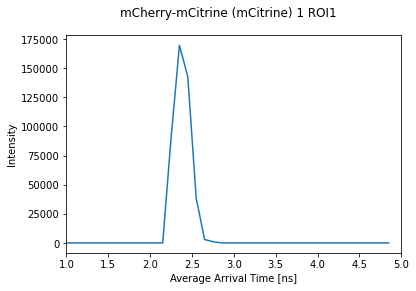

In [15]:
ax=sns.lineplot(data=binned.loc[(binned["condition"]=="mcherry-mcitrine"
                                    )&(binned["roi"]=="1")&(binned["embryo"]=="e1"
                                    )],x="aat",y="int")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.set_xlim([1,5])

ax.set(xlabel="Average Arrival Time [ns]", ylabel = "Intensity")

plt.suptitle('mCherry-mCitrine (mCitrine) 1 ROI1')


In [16]:
binned.to_csv("d3.csv")

In [17]:
binned

,nucleus_id,int,condition,embryo,roi,sample,aat
0,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.05
1,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.15
2,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.25
3,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.35
4,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.45
...,...,...,...,...,...,...,...
43213,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.45
43214,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.55
43215,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.65
43216,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.75


In [18]:
binned = pd.read_csv("d3.csv", usecols=range(1,8))

In [22]:
# calculate mfd
binned["mfd_a"]=binned["aat"]/2.6
binned["mfd_a"]=1-binned["mfd_a"]
binned["mfd_b"]=binned["aat"]/5.2
binned["mfd_b"]=binned["mfd_b"]-1
binned["mfd_b"]=binned["mfd_b"]**2
binned["mfd"]=(binned["mfd_a"]/binned["mfd_b"])*100
binned["mfd"]=np.where(binned["mfd"]<0,0,binned["mfd"])
binned

,nucleus_id,int,condition,embryo,roi,sample,aat,t_max,I_max,weighted_intensity_per_nucleus,...,weighted_intensity*lifetime_per_nucleus,sum_weighted_intensity*lifetime_per_nucleus,mean_weighted_lifetime_per_nucleus,average_mean_weighted_lifetime_per_embryo,average_mean_weighted_lifetime_per_condition,average_t_max_per_embryo,average_t_max_per_condition,mfd_a,mfd_b,mfd
0,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.05,2.55,174619.0,0.0,...,0.0,8.182227,2.583418,2.706084,2.654005,2.668699,2.631330,0.980769,0.980862,99.990574
1,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.15,2.55,174619.0,0.0,...,0.0,8.182227,2.583418,2.706084,2.654005,2.668699,2.631330,0.942308,0.943140,99.911773
2,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.25,2.55,174619.0,0.0,...,0.0,8.182227,2.583418,2.706084,2.654005,2.668699,2.631330,0.903846,0.906158,99.744924
3,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.35,2.55,174619.0,0.0,...,0.0,8.182227,2.583418,2.706084,2.654005,2.668699,2.631330,0.865385,0.869915,99.479222
4,mcherry+mcitrine_e1_1,0.0,mcherry+mcitrine,e1,1,mcherry+mcitrine_e1,0.45,2.55,174619.0,0.0,...,0.0,8.182227,2.583418,2.706084,2.654005,2.668699,2.631330,0.826923,0.834412,99.102493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43213,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.45,2.55,51232.0,0.0,...,0.0,5.557268,2.584724,2.619503,2.619503,2.608647,2.608647,-0.711538,0.020803,0.000000
43214,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.55,2.55,51232.0,0.0,...,0.0,5.557268,2.584724,2.619503,2.619503,2.608647,2.608647,-0.750000,0.015625,0.000000
43215,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.65,2.55,51232.0,0.0,...,0.0,5.557268,2.584724,2.619503,2.619503,2.608647,2.608647,-0.788462,0.011187,0.000000
43216,mcitrine_e1_99,0.0,mcitrine,e1,99,mcitrine_e1,4.75,2.55,51232.0,0.0,...,0.0,5.557268,2.584724,2.619503,2.619503,2.608647,2.608647,-0.826923,0.007489,0.000000


In [24]:
# normalise individual nucleus AATs 
binned["normalised_per_nucleus"]=binned["int"]/binned.groupby(["nucleus_id"])["int"].transform("max")
# Average normalised AATs across embryos for each condition + stage. Re-normalise
binned["normalised_per_nucleus_mean_over_condition"]=binned.groupby(["condition","aat"])["normalised_per_nucleus"].transform("mean")
binned["normalised_per_sample"]=binned["normalised_per_nucleus_mean_over_condition"]/binned.groupby(["condition"])["normalised_per_nucleus_mean_over_condition"].transform("max")

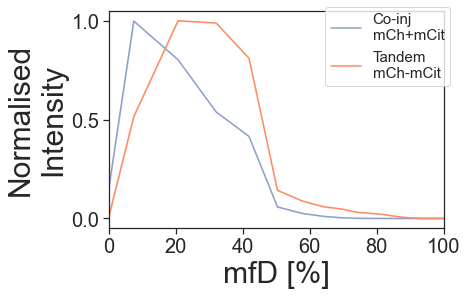

In [27]:
# plot average normalised Intensity vs AAT across nulcei condition

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
hue_order =["mcherry+mcitrine","mcherry-mcitrine"]

#plot
ax=sns.lineplot(data=binned,x="mfd",y="normalised_per_sample",hue="condition", 
                hue_order=hue_order, palette=palette, legend=False)

#set x axis tick intervals and font size
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xticks(fontsize=20)
ax.set_xlim([0,100])

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.yticks(fontsize=20)

#set x and y axis labels
ax.set_xlabel("mfD [%]", fontsize=30)
ax.set_ylabel("Normalised\nIntensity",fontsize=30)

#legend
ax.legend(labels=["Co-inj\nmCh+mCit","Tandem\nmCh-mCit"], title="",
          fontsize=15, bbox_to_anchor=(1.02, 1.02), loc='upper right' , borderaxespad=0)

#save plot

plt.savefig("d3_mfd-FRET_histograms.png",dpi=300, bbox_inches='tight')

In [19]:
#calculate lifetime at maximum intensity of each nucleus BINNED
binned["t_max"]=binned.loc[binned.groupby(["nucleus_id"]).int.idxmax(),"aat"]
binned["t_max"]=binned.groupby(["nucleus_id"])["t_max"].transform("max")

In [20]:
# calculate mean weighted lifetime

#calculate maximum intensity of each nucleus
binned["I_max"]=binned.loc[binned.groupby(["nucleus_id"]).int.idxmax(),"int"]
binned["I_max"]=binned.groupby(["nucleus_id"])["I_max"].transform("max")

#first by weighting intensities per lifetime int + summing across each roi
binned["weighted_intensity_per_nucleus"]=binned["int"]/binned["I_max"]
binned["sum_weighted_intensity_per_nucleus"]=binned.groupby(["nucleus_id"])["weighted_intensity_per_nucleus"].transform("sum")

# then by multiplying weighted intensity * lifetime
binned["weighted_intensity*lifetime_per_nucleus"]=binned["weighted_intensity_per_nucleus"]*binned["aat"]
binned["sum_weighted_intensity*lifetime_per_nucleus"]=binned.groupby(["nucleus_id"])["weighted_intensity*lifetime_per_nucleus"].transform("sum")

# mean weighted lifetime per nucleus
binned["mean_weighted_lifetime_per_nucleus"]=binned["sum_weighted_intensity*lifetime_per_nucleus"]/binned["sum_weighted_intensity_per_nucleus"]


In [21]:
#average mean weighted lifetime across nuclei for each embryo/condition
binned["average_mean_weighted_lifetime_per_embryo"]=binned.groupby(["sample"])["mean_weighted_lifetime_per_nucleus"].transform("mean")
binned["average_mean_weighted_lifetime_per_condition"]=binned.groupby(["condition","aat"])["mean_weighted_lifetime_per_nucleus"].transform("mean")

#average most prominent lifetime across nuclei for each embryo/condition
binned["average_t_max_per_embryo"]=binned.groupby(["sample"])["t_max"].transform("mean")
binned["average_t_max_per_condition"]=binned.groupby(["condition","aat"])["t_max"].transform("mean")

In [28]:
#mean weighted mfd

# then by multiplying weighted intensity * lifetime
binned["weighted_intensity*mfd_per_nucleus"]=binned["weighted_intensity_per_nucleus"]*binned["mfd"]
binned["sum_weighted_intensity*mfd_per_nucleus"]=binned.groupby(["nucleus_id"])["weighted_intensity*mfd_per_nucleus"].transform("sum")

# mean weighted lifetime per nucleus
binned["mean_weighted_mfd_per_nucleus"]=binned["sum_weighted_intensity*mfd_per_nucleus"]/binned["sum_weighted_intensity_per_nucleus"]
binned["mean_weighted_mfd_per_nucleus"]=np.where(binned["mean_weighted_mfd_per_nucleus"]<0,0,binned["mean_weighted_mfd_per_nucleus"])

#average wean weighted lifetime across nuclei for each embryo
binned["average_mean_weighted_mfd_per_embryo"]=binned.groupby(["sample"])["mean_weighted_mfd_per_nucleus"].transform("mean")

binned["average_mean_weighted_mfd_per_condition"]=binned.groupby(["condition","mfd"])["mean_weighted_mfd_per_nucleus"].transform("mean")



In [29]:
#tidy dataframe - drop nucleus duplicates
dfmelt = binned[["nucleus_id","embryo","condition","mean_weighted_lifetime_per_nucleus","I_max","t_max","mean_weighted_mfd_per_nucleus"]].drop_duplicates(subset="nucleus_id")
dfmelt["sample"]=dfmelt["condition"]+"_"+dfmelt["embryo"]
dfmelt

,nucleus_id,embryo,condition,mean_weighted_lifetime_per_nucleus,I_max,t_max,mean_weighted_mfd_per_nucleus,sample
0,mcherry+mcitrine_e1_1,e1,mcherry+mcitrine,2.583418,174619.0,2.55,8.357385,mcherry+mcitrine_e1
49,mcherry+mcitrine_e1_10,e1,mcherry+mcitrine,2.782570,4263.0,2.65,5.228756,mcherry+mcitrine_e1
98,mcherry+mcitrine_e1_100,e1,mcherry+mcitrine,2.763297,1838.0,2.75,6.531743,mcherry+mcitrine_e1
147,mcherry+mcitrine_e1_101,e1,mcherry+mcitrine,2.579803,3604.0,2.55,11.051441,mcherry+mcitrine_e1
196,mcherry+mcitrine_e1_102,e1,mcherry+mcitrine,2.818274,727.0,2.85,8.496375,mcherry+mcitrine_e1
...,...,...,...,...,...,...,...,...
42973,mcitrine_e1_95,e1,mcitrine,2.579817,58953.0,2.55,7.109852,mcitrine_e1
43022,mcitrine_e1_96,e1,mcitrine,2.599532,68758.0,2.55,5.780895,mcitrine_e1
43071,mcitrine_e1_97,e1,mcitrine,2.580904,73045.0,2.55,6.538129,mcitrine_e1
43120,mcitrine_e1_98,e1,mcitrine,2.587755,39105.0,2.55,7.247468,mcitrine_e1


In [41]:
dfmelt.loc[(dfmelt["condition"]=="mcherry-mcitrine")&(dfmelt["embryo"]=="e3")]["nucleus_id"]

31311      mcherry-mcitrine_e3_1
31360     mcherry-mcitrine_e3_10
31409    mcherry-mcitrine_e3_100
31458    mcherry-mcitrine_e3_101
31507    mcherry-mcitrine_e3_102
                  ...           
36456     mcherry-mcitrine_e3_95
36505     mcherry-mcitrine_e3_96
36554     mcherry-mcitrine_e3_97
36603     mcherry-mcitrine_e3_98
36652     mcherry-mcitrine_e3_99
Name: nucleus_id, Length: 110, dtype: object

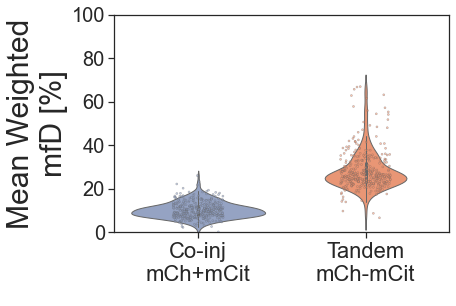

In [31]:
# plot mean weighted mfd across nulcei for each condition

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
order =["mcherry+mcitrine","mcherry-mcitrine"]

#violin and scatterplots


ax=sns.violinplot(data=dfmelt, x="condition",y="mean_weighted_mfd_per_nucleus", order=order,
                  marker="o", alpha=0.5,  size = 2, linewidth=1, palette=palette)


ax=sns.stripplot(data=dfmelt, x="condition",y="mean_weighted_mfd_per_nucleus", order=order,
                 marker="o", alpha=0.5, jitter = 0.15, size = 2, linewidth=0.5, palette=palette)

#set x and y axis labels
ax.set_xlabel(" ")
ax.set_ylabel("Mean Weighted\nmfD [%]",fontsize=30)

#set y axis tick intervals and font size
ax.set(ylim=(0,100))
plt.yticks(fontsize=20)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))


# set x axis tick labels
ax.set_xticklabels(["Co-inj\nmCh+mCit","Tandem\nmCh-mCit"], fontsize = 22)


#save plot

plt.savefig("d3_mfd-FRET_mwmfD.png",dpi=300, bbox_inches='tight')

In [54]:
dfmelt.loc[(dfmelt["condition"]=="mcherry+mcitrine")]["mean_weighted_mfd_per_nucleus"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         8.357385
49        5.228756
98        6.531743
147      11.051441
196       8.496375
           ...    
18914     7.523111
18963    15.950039
19012    12.189048
19061     5.044222
19110     9.212312
Name: mean_weighted_mfd_per_nucleus, Length: 391, dtype: float64>

In [52]:
dfmelt.loc[(dfmelt["condition"]=="mcherry-mcitrine")]["mean_weighted_mfd_per_nucleus"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 19159    27.929775
19208    26.702906
19257    25.455638
19306    28.652534
19355    24.544889
           ...    
36456    41.748122
36505    29.742430
36554    34.669673
36603    36.244687
36652    32.610971
Name: mean_weighted_mfd_per_nucleus, Length: 358, dtype: float64>